In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from face_verification.api import *
from face_verification.utils import *

%matplotlib inline

Using TensorFlow backend.


# Read Sample Images

In [2]:
# test image path and name list
path_list = ['./images/test/Aaron_Eckhart_01.jpg', 
             './images/test/Aaron_Guiel_01.jpg', 
             './images/test/Aaron_Peirsol_01.jpg', 
             './images/test/Aaron_Peirsol_02.jpg', 
             './images/test/Aaron_Sorkin_01.jpg', 
             './images/test/Aaron_Sorkin_02.jpg', 
             './images/test/Annette_Bening_01.jpg', 
             './images/test/Annette_Bening_02.jpg', 
             './images/test/Barbara_Walters_01.jpg', 
             './images/test/Barbara_Walters_02.jpg']

name_list = ['Aaron Eckhart', 'Aaron Guiel', 'Aaron Peirsol', 'Aaron Peirsol', 
             'Aaron Sorkin', 'Aaron Sorkin', 'Annette Bening', 'Annette Bening', 
             'Barbara Walters', 'Barbara Walters']

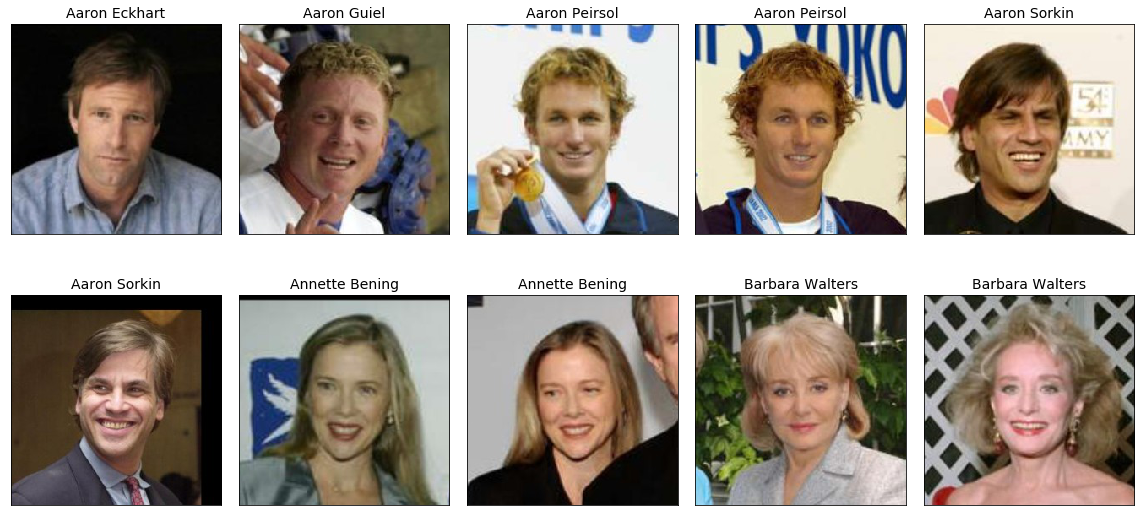

In [3]:
# read raw images
images = []
gray_imgs = []

for path in path_list:
    img = read_image(path)
    images.append(img)
    gray_imgs.append(BGR2Gray(img))

# visualization
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))
for i in range(len(path_list)):
    ax[i // 5][i % 5].imshow(BGR2RGB(images[i]))
    ax[i // 5][i % 5].set_title(name_list[i], fontsize=14)
    ax[i // 5][i % 5].set_xticks([])
    ax[i // 5][i % 5].set_yticks([])
plt.tight_layout()
fig.savefig('./results/input_images.png', dpi=200)
plt.show()

# Frontal Face Detection

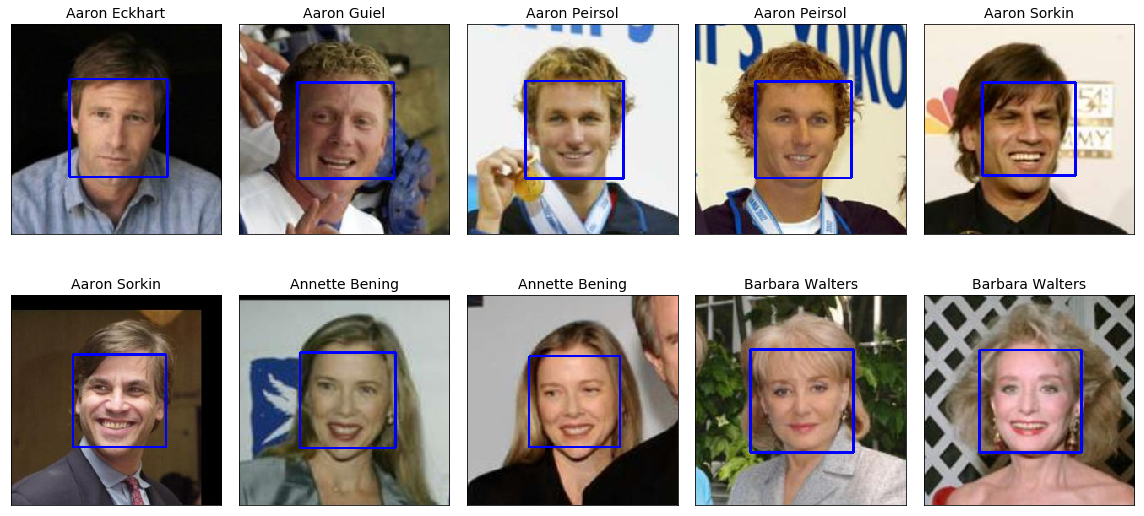

In [4]:
# detect faces
haar_xml='./face_verification/xmls/haarcascade_frontalface_default.xml'
haar_faces = []
for image in images:
    try:
        faces = cascade_detector(image, xml=haar_xml, scale_factor=1.3, min_neighbors=5)
        haar_faces.append(faces)
    except:
        haar_faces.append([])

# denote the faces with rectangles
rec_images = []
for i in range(len(images)):
    rec_images.append(denote_face(images[i], haar_faces[i]))

# visualization
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))
for i in range(len(images)):
    ax[i // 5][i % 5].imshow(BGR2RGB(rec_images[i]))
    ax[i // 5][i % 5].set_title(name_list[i], fontsize=14)
    ax[i // 5][i % 5].set_xticks([])
    ax[i // 5][i % 5].set_yticks([])
plt.tight_layout()
fig.savefig('./results/face_detection.png', dpi=200)
plt.show()

# Frontal Face Crop

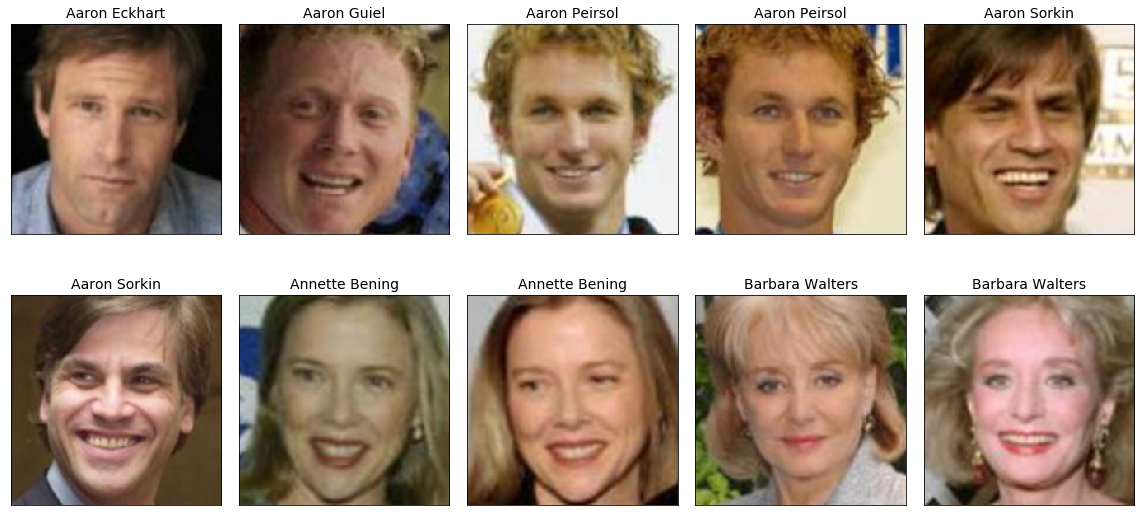

In [5]:
# crop faces at scale_factor=1.3
crop_images = []
for i in range(len(images)):
    if len(haar_faces[i]) == 0:
        crop_images.append(images[i])
    else:
        cropped = crop_face(images[i], haar_faces[i], scale_factor=1.3, target_size=(256, 256))
        crop_images.append(cropped)

# visualization
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))
for i in range(len(images)):
    ax[i // 5][i % 5].imshow(BGR2RGB(crop_images[i]))
    ax[i // 5][i % 5].set_title(name_list[i], fontsize=14)
    ax[i // 5][i % 5].set_xticks([])
    ax[i // 5][i % 5].set_yticks([])
plt.tight_layout()
fig.savefig('./results/cropped_faces.png', dpi=200)
plt.show()

# Face Verification

In [6]:
# test image path and name list
path_list = ['./images/test/Aaron_Peirsol_01.jpg', 
             './images/test/Aaron_Peirsol_02.jpg', 
             './images/test/Aaron_Sorkin_01.jpg', 
             './images/test/Aaron_Sorkin_02.jpg', 
             './images/test/Annette_Bening_01.jpg', 
             './images/test/Annette_Bening_02.jpg']

name_list = ['Aaron Peirsol 1', 'Aaron Peirsol 2', 'Aaron Sorkin 1', 
             'Aaron Sorkin 2', 'Annette Bening 1', 'Annette Bening 2']

In [7]:
# define path to pre-trained model and haar xml
model_path = './models/facenet-margin-03-final.h5'
xml_path = './face_verification/xmls/haarcascade_frontalface_default.xml'

# intialize face verification model
face_model = face_verify(path=model_path, xml=xml_path)

In [8]:
print('| {0:^20s} | {1:^20s} | {2:^10s} |'.format('Name', 'Name', 'Distance'))
print('-' * 60)
for i in range(len(path_list)):
    for j in range(len(path_list)):
        if i == j:
            continue
        
        # get paths to image
        path1 = path_list[i]
        path2 = path_list[j]
        
        # get the distance of image 1 and image 2
        img1, img2, distance = face_model.get_distance(path1, path2)
        name1, name2 = name_list[i], name_list[j]
        print('| {0:^20s} | {1:^20s} | {2:^10.6f} |'.format(name1, name2, distance))
    print()

|         Name         |         Name         |  Distance  |
------------------------------------------------------------
|   Aaron Peirsol 1    |   Aaron Peirsol 2    |  0.080878  |
|   Aaron Peirsol 1    |    Aaron Sorkin 1    |  0.239907  |
|   Aaron Peirsol 1    |    Aaron Sorkin 2    |  0.171671  |
|   Aaron Peirsol 1    |   Annette Bening 1   |  0.151884  |
|   Aaron Peirsol 1    |   Annette Bening 2   |  0.150457  |

|   Aaron Peirsol 2    |   Aaron Peirsol 1    |  0.080878  |
|   Aaron Peirsol 2    |    Aaron Sorkin 1    |  0.251050  |
|   Aaron Peirsol 2    |    Aaron Sorkin 2    |  0.174558  |
|   Aaron Peirsol 2    |   Annette Bening 1   |  0.152690  |
|   Aaron Peirsol 2    |   Annette Bening 2   |  0.130374  |

|    Aaron Sorkin 1    |   Aaron Peirsol 1    |  0.239907  |
|    Aaron Sorkin 1    |   Aaron Peirsol 2    |  0.251050  |
|    Aaron Sorkin 1    |    Aaron Sorkin 2    |  0.149091  |
|    Aaron Sorkin 1    |   Annette Bening 1   |  0.317565  |
|    Aaron Sorkin 1   